In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
ls


'Percentage Calculator.xlsx'   Untitled.ipynb


In [4]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 243 kB 1.5 MB/s eta 0:00:01


In [5]:
df=pd.read_excel('Percentage Calculator.xlsx')

In [64]:
df['sum']=df.iloc[:,1:7].sum(axis=1)

In [7]:
#Checking out dtypes

In [8]:
df.dtypes


Name                 object
Physics               int64
Chemistry             int64
Mathematics           int64
Biology               int64
Computer Science      int64
English               int64
Total                 int64
Marks                 int64
Percentage          float64
dtype: object

In [15]:
df.describe()

,Physics,Chemistry,Mathematics,Biology,Computer Science,English,Total,Marks,Percentage
count,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.0,49.000000,49.000000
mean,62.510204,63.836735,86.591837,80.020408,71.77551,84.510204,600.0,449.244898,74.874150
std,13.419703,14.965720,12.854828,13.114067,15.20590,5.923549,0.0,31.696826,5.282804
min,36.000000,39.000000,45.000000,41.000000,47.00000,65.000000,600.0,361.000000,60.166667
25%,52.000000,48.000000,76.000000,75.000000,61.00000,82.000000,600.0,433.000000,72.166667
50%,63.000000,67.000000,92.000000,83.000000,68.00000,86.000000,600.0,452.000000,75.333333
75%,69.000000,76.000000,96.000000,88.000000,86.00000,87.000000,600.0,470.000000,78.333333
max,90.000000,98.000000,99.000000,99.000000,99.00000,98.000000,600.0,521.000000,86.833333


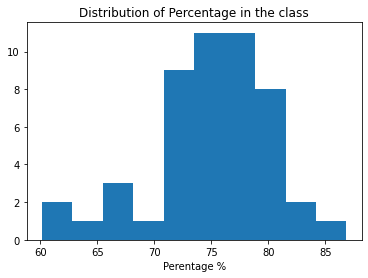

In [21]:
#
plt.hist(df.Percentage)
plt.xlabel("Perentage %")
plt.title("Distribution of Percentage in the class")
plt.savefig("Percentage_hist.png")

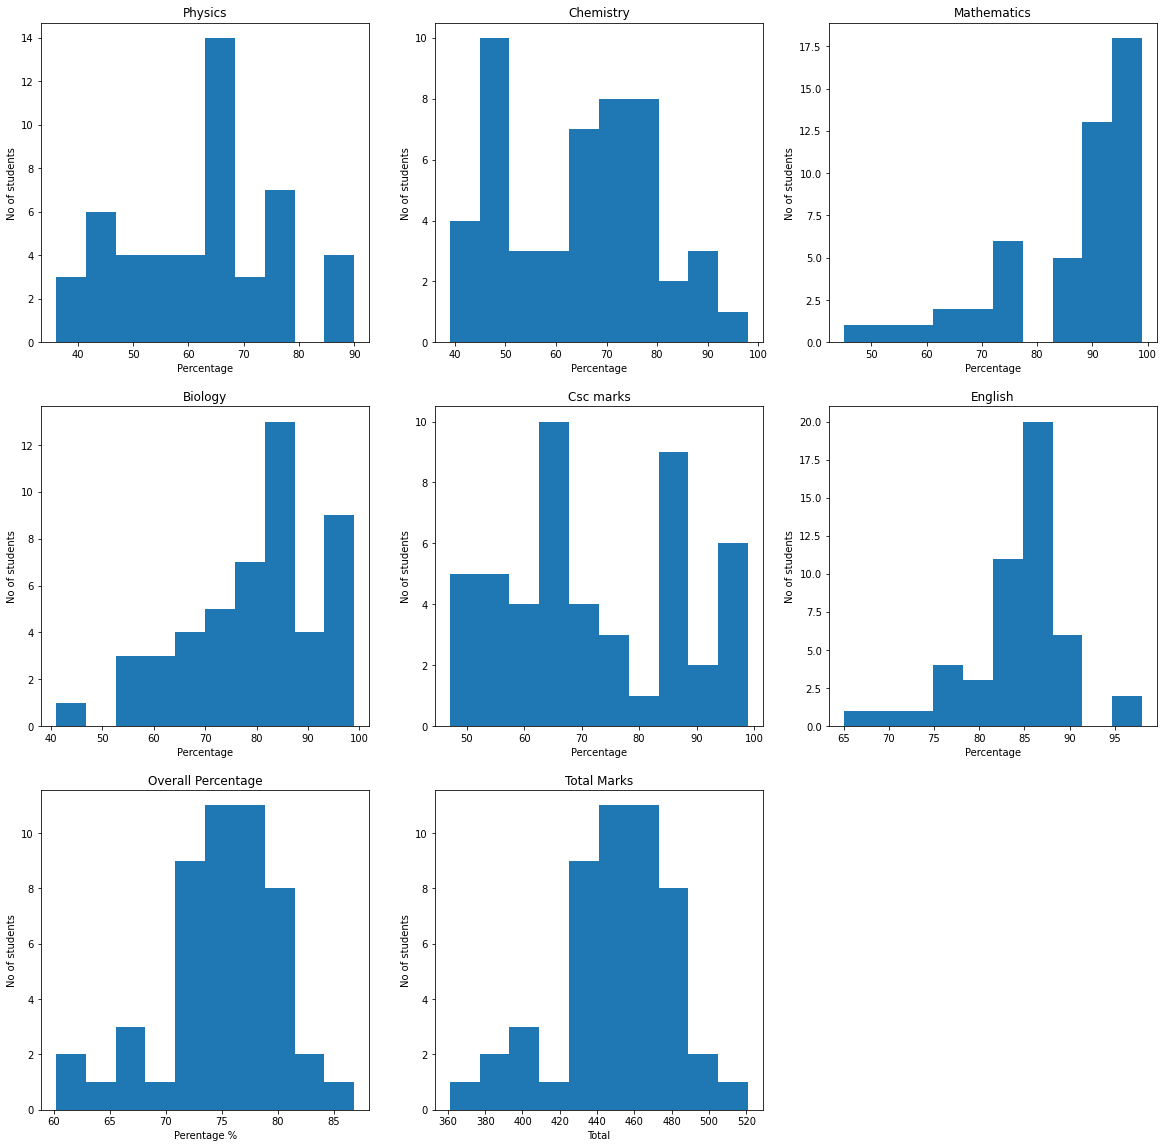

In [65]:
fig = plt.figure(figsize=(20,20))

plt.subplot(3,3,7)
plt.hist(df.Percentage)
plt.xlabel("Perentage %")
plt.ylabel("No of students")
plt.title("Overall Percentage")

plt.subplot(3,3,6)
plt.hist(df.English)
plt.ylabel("No of students")
plt.xlabel("Percentage")
plt.title("English")

plt.subplot(3,3,5)
plt.hist(df['Computer Science'])
plt.ylabel("No of students")
plt.xlabel("Percentage")
plt.title("Csc marks")

plt.subplot(3,3,4)
plt.hist(df['Biology'])
plt.xlabel("Percentage")
plt.ylabel("No of students")
plt.title("Biology")

plt.subplot(3,3,3)
plt.hist(df['Mathematics'])
plt.xlabel("Percentage")
plt.ylabel("No of students")
plt.title("Mathematics")

plt.subplot(3,3,2)
plt.hist(df['Chemistry'])
plt.xlabel("Percentage")
plt.ylabel("No of students")
plt.title("Chemistry")

plt.subplot(3,3,1)
plt.hist(df['Physics'])
plt.xlabel("Percentage")
plt.ylabel("No of students")
plt.title("Physics")

plt.subplot(3,3,8)
plt.hist(df['sum'])
plt.xlabel("Total")
plt.ylabel("No of students")
plt.title("Total Marks")


plt.savefig('Class Distribution.png')




In [175]:
corr=df.iloc[:,1:7].corr()
mask = np.triu(np.ones_like(corr))

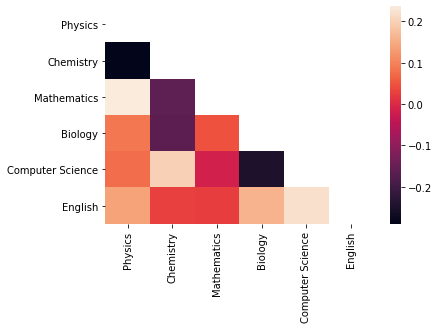

In [177]:
#From the heatmap we can observe there is not much correlation between the marks of different subjects
sn.heatmap(corr,mask=mask)
plt.savefig('heatmap.png')

In [97]:
labels=['Physics','Chemistry','Mathematics','Computer Science', 'Biology', 'English']

In [122]:
stats=df.loc[:,labels].mean()

In [123]:


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))



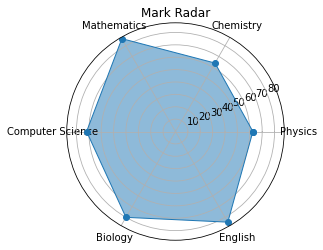

In [169]:
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)
ax.set_title('Mark Radar')
ax.grid(True)
plt.savefig('radar.png')

In [167]:
df_marks=df[labels]

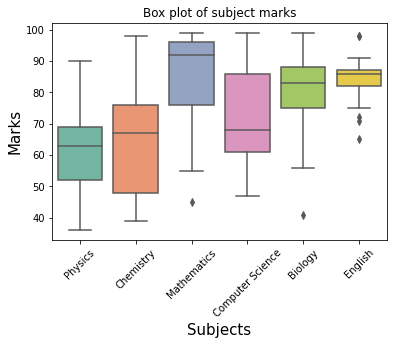

In [168]:
ax=sn.boxplot(data=df_marks, orient="v", palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Subjects',size=15)
plt.ylabel('Marks',size=15)
plt.title('Box plot of subject marks')
plt.savefig('Boxplt.png')